# Possible coverage gaps during Medicaid Unwinding

### Step 1.a

The Excel links in Steps 1-2 are available [here](https://www.medicaid.gov/resources-for-states/coronavirus-disease-2019-covid-19/unwinding-and-returning-regular-operations-after-covid-19/data-reporting/monthly-data-reports/index.html) under "Medicaid and CHIP CAA Reporting Metrics". 

This first dataset is the most recent to be released on a monthly basis. As a part of the data cleaning and transformation process, it will be combined with others from previous months.

The following rows are skipped because:
- row 0 is the document title and is non functional
- row 2 represents cumulative country wide data, which will not be used in this analysis
- rows 54-59 contain data notes and an accessibility feature

In [1]:
import pandas as pd

dec_medicaid = pd.read_excel('https://www.medicaid.gov/media/174606', skiprows = [0,2,54,55,56,57,58,59])
dec_medicaid.head()

,State,Total number of Medicaid and CHIP beneficiaries for whom a renewal was initiated in the reporting month\n(Metric 4),Total number of beneficiaries due for renewal in the reporting month\n(Metric 5),Total number of beneficiaries due for renewal in the reporting month whose coverage was renewed\n(Metric 5a),Total beneficiaries renewed on an ex parte basis (i.e. based on available information)\n(Metric 5a1),Total beneficiaries renewed based on the return of a renewal form\n(Metric 5a2),Total number of beneficiaries due for renewal in the reporting month whose coverage was terminated\n(Metric 5b + 5c),Total beneficiaries determined ineligible for Medicaid and CHIP based on the return of a renewal form\n(Metric 5b),Total beneficiaries whose coverage was terminated for a procedural or administrative reason\n(Metric 5c),Total number of beneficiaries due for renewal in the reporting month whose renewal was pending at the end of the month\n(Metric 5d),Data notes
0,AK,16448,12729,4710,3288,1422,2271,1501,770,5748,"R4, R8"
1,AL,85889,103109,67036,40593,26443,33465,3998,29467,2608,Blank
2,AR,41433,43579,37454,33613,3841,4599,1009,3590,1526,Blank
3,AZ,168860,200682,175434,164094,11340,20761,6807,13954,4487,Blank
4,CA,1210592,1255471,899931,829478,70453,108863,20595,88268,246677,Blank


### Step 1.b

I then drop the columns of data irrelevant to this analysis. It's a lot, but we'll be adding new columns in from additional datasets.

In [2]:
dec_medicaid.drop('Total number of Medicaid and CHIP beneficiaries for whom a renewal was initiated in the reporting month\n(Metric 4)', axis = 1, inplace = True)
dec_medicaid.drop('Total number of beneficiaries due for renewal in the reporting month\n(Metric 5)', axis = 1, inplace = True)
dec_medicaid.drop('Total beneficiaries renewed on an ex parte basis (i.e. based on available information)\n(Metric 5a1)', axis = 1, inplace = True)
dec_medicaid.drop('Total beneficiaries renewed based on the return of a renewal form\n(Metric 5a2)', axis = 1, inplace = True)
dec_medicaid.drop('Total beneficiaries determined ineligible for Medicaid and CHIP based on the return of a renewal form\n(Metric 5b)', axis = 1, inplace = True)
dec_medicaid.drop('Total beneficiaries whose coverage was terminated for a procedural or administrative reason\n(Metric 5c)', axis = 1, inplace = True)
dec_medicaid.drop('Total number of beneficiaries due for renewal in the reporting month whose renewal was pending at the end of the month\n(Metric 5d)', axis = 1, inplace = True)
dec_medicaid.drop('Data notes', axis = 1, inplace = True)
dec_medicaid.head()

,State,Total number of beneficiaries due for renewal in the reporting month whose coverage was renewed\n(Metric 5a),Total number of beneficiaries due for renewal in the reporting month whose coverage was terminated\n(Metric 5b + 5c)
0,AK,4710,2271
1,AL,67036,33465
2,AR,37454,4599
3,AZ,175434,20761
4,CA,899931,108863


### Step 1.c

Now I add a new column for month, which will be key to distinguishing the different monthly datasets from each other once they're all merged into one dataframe.

In [3]:
month = 'December'
dec_medicaid['Month'] = month
dec_medicaid.head()

,State,Total number of beneficiaries due for renewal in the reporting month whose coverage was renewed\n(Metric 5a),Total number of beneficiaries due for renewal in the reporting month whose coverage was terminated\n(Metric 5b + 5c),Month
0,AK,4710,2271,December
1,AL,67036,33465,December
2,AR,37454,4599,December
3,AZ,175434,20761,December
4,CA,899931,108863,December


### Step 1.d

Lastly, the column names are updated to remove formatting issues and be easier to work with.

In [4]:
dec_medicaid.rename(columns = {'Total number of beneficiaries due for renewal in the reporting month whose coverage was renewed\n(Metric 5a)': 'Medicaid renewed', 'Total number of beneficiaries due for renewal in the reporting month whose coverage was terminated\n(Metric 5b + 5c)': 'Medicaid terminated'}, inplace = True)
dec_medicaid.head()

,State,Medicaid renewed,Medicaid terminated,Month
0,AK,4710,2271,December
1,AL,67036,33465,December
2,AR,37454,4599,December
3,AZ,175434,20761,December
4,CA,899931,108863,December


I now repeat steps 1.a through 1.e for each month of data.

### Step 2.a November

In [5]:
nov_medicaid = pd.read_excel('https://www.medicaid.gov/media/172516', skiprows = [0,2,54,55,56,57,58,59])

nov_medicaid.drop('Total number of Medicaid and CHIP beneficiaries for whom a renewal was initiated in the reporting month\n(Metric 4)', axis = 1, inplace = True)
nov_medicaid.drop('Total number of beneficiaries due for renewal in the reporting month\n(Metric 5)', axis = 1, inplace = True)
nov_medicaid.drop('Total beneficiaries renewed on an ex parte basis (i.e. based on available information)\n(Metric 5a1)', axis = 1, inplace = True)
nov_medicaid.drop('Total beneficiaries renewed based on the return of a renewal form\n(Metric 5a2)', axis = 1, inplace = True)
nov_medicaid.drop('Total beneficiaries determined ineligible for Medicaid and CHIP based on the return of a renewal form\n(Metric 5b)', axis = 1, inplace = True)
nov_medicaid.drop('Total beneficiaries whose coverage was terminated for a procedural or administrative reason\n(Metric 5c)', axis = 1, inplace = True)
nov_medicaid.drop('Total number of beneficiaries due for renewal in the reporting month whose renewal was pending at the end of the month\n(Metric 5d)', axis = 1, inplace = True)
nov_medicaid.drop('Data notes', axis = 1, inplace = True)

month = 'November'
nov_medicaid['Month'] = month

nov_medicaid.rename(columns = {'Total number of beneficiaries due for renewal in the reporting month whose coverage was renewed\n(Metric 5a)': 'Medicaid renewed', 'Total number of beneficiaries due for renewal in the reporting month whose coverage was terminated\n(Metric 5b + 5c)': 'Medicaid terminated'}, inplace = True)

nov_medicaid.head()

,State,Medicaid renewed,Medicaid terminated,Month
0,AK,3971,1847,November
1,AL,61893,29765,November
2,AR,27703,3800,November
3,AZ,134923,19442,November
4,CA,493960,205710,November


### Step 2.b October

In [6]:
oct_medicaid = pd.read_excel('https://www.medicaid.gov/media/170936', skiprows = [0,2,54,55,56,57,58,59])

oct_medicaid.drop('Total number of Medicaid and CHIP beneficiaries for whom a renewal was initiated in the reporting month\n(Metric 4)', axis = 1, inplace = True)
oct_medicaid.drop('Total number of beneficiaries due for renewal in the reporting month\n(Metric 5)', axis = 1, inplace = True)
oct_medicaid.drop('Total beneficiaries renewed on an ex parte basis (i.e. based on available information)\n(Metric 5a1)', axis = 1, inplace = True)
oct_medicaid.drop('Total beneficiaries renewed based on the return of a renewal form\n(Metric 5a2)', axis = 1, inplace = True)
oct_medicaid.drop('Total beneficiaries determined ineligible for Medicaid and CHIP based on the return of a renewal form\n(Metric 5b)', axis = 1, inplace = True)
oct_medicaid.drop('Total beneficiaries whose coverage was terminated for a procedural or administrative reason\n(Metric 5c)', axis = 1, inplace = True)
oct_medicaid.drop('Total number of beneficiaries due for renewal in the reporting month whose renewal was pending at the end of the month\n(Metric 5d)', axis = 1, inplace = True)
oct_medicaid.drop('Data notes', axis = 1, inplace = True)

month = 'October'
oct_medicaid['Month'] = month

oct_medicaid.rename(columns = {'Total number of beneficiaries due for renewal in the reporting month whose coverage was renewed\n(Metric 5a)': 'Medicaid renewed', 'Total number of beneficiaries due for renewal in the reporting month whose coverage was terminated\n(Metric 5b + 5c)': 'Medicaid terminated'}, inplace = True)

oct_medicaid.head()

,State,Medicaid renewed,Medicaid terminated,Month
0,AK,4272,1984,October
1,AL,67958,32823,October
2,AR,30414,5734,October
3,AZ,168065,28706,October
4,CA,512198,198537,October


### Step 2.c September

In [7]:
sep_medicaid = pd.read_excel('https://www.medicaid.gov/media/168031', skiprows = [0,2,54,55,56,57,58,59])

sep_medicaid.drop('Total number of Medicaid and CHIP beneficiaries for whom a renewal was initiated in the reporting month\n(Metric 4)', axis = 1, inplace = True)
sep_medicaid.drop('Total number of beneficiaries due for renewal in the reporting month\n(Metric 5)', axis = 1, inplace = True)
sep_medicaid.drop('Total beneficiaries renewed on an ex parte basis (i.e. based on available information)\n(Metric 5a1)', axis = 1, inplace = True)
sep_medicaid.drop('Total beneficiaries renewed based on the return of a renewal form\n(Metric 5a2)', axis = 1, inplace = True)
sep_medicaid.drop('Total beneficiaries determined ineligible for Medicaid and CHIP based on the return of a renewal form\n(Metric 5b)', axis = 1, inplace = True)
sep_medicaid.drop('Total beneficiaries whose coverage was terminated for a procedural or administrative reason\n(Metric 5c)', axis = 1, inplace = True)
sep_medicaid.drop('Total number of beneficiaries due for renewal in the reporting month whose renewal was pending at the end of the month\n(Metric 5d)', axis = 1, inplace = True)
sep_medicaid.drop('Data notes', axis = 1, inplace = True)

month = 'September'
sep_medicaid['Month'] = month

sep_medicaid.rename(columns = {'Total number of beneficiaries due for renewal in the reporting month whose coverage was renewed\n(Metric 5a)':'Medicaid renewed', 'Total number of beneficiaries due for renewal in the reporting month whose coverage was terminated\n(Metric 5b + 5c)': 'Medicaid terminated'}, inplace = True)

sep_medicaid.head()

,State,Medicaid renewed,Medicaid terminated,Month
0,AK,4111,2171,September
1,AL,69535,34876,September
2,AR,45536,29583,September
3,AZ,172756,39667,September
4,CA,506846,219809,September


### Step 2.d August

In [8]:
aug_medicaid = pd.read_excel('https://www.medicaid.gov/media/166671', skiprows = [0,2,54,55,56,57,58,59,60])

aug_medicaid.drop('Total number of Medicaid and CHIP beneficiaries for whom a renewal was initiated in the reporting month\n(Metric 4)', axis = 1, inplace = True)
aug_medicaid.drop('Total number of beneficiaries due for renewal in the reporting month\n(Metric 5)', axis = 1, inplace = True)
aug_medicaid.drop('Total beneficiaries renewed on an ex parte basis (i.e. based on available information)\n(Metric 5a1)', axis = 1, inplace = True)
aug_medicaid.drop('Total beneficiaries renewed based on the return of a renewal form\n(Metric 5a2)', axis = 1, inplace = True)
aug_medicaid.drop('Total beneficiaries determined ineligible for Medicaid and CHIP based on the return of a renewal form\n(Metric 5b)', axis = 1, inplace = True)
aug_medicaid.drop('Total beneficiaries whose coverage was terminated for a procedural or administrative reason\n(Metric 5c)', axis = 1, inplace = True)
aug_medicaid.drop('Total number of beneficiaries due for renewal in the reporting month whose renewal was pending at the end of the month\n(Metric 5d)', axis = 1, inplace = True)
aug_medicaid.drop('Data notes', axis = 1, inplace = True)

month = 'August'
aug_medicaid['Month'] = month

aug_medicaid.rename(columns = {'Total number of beneficiaries due for renewal in the reporting month whose coverage was renewed\n(Metric 5a)': 'Medicaid renewed', 'Total number of beneficiaries due for renewal in the reporting month whose coverage was terminated\n(Metric 5b + 5c)': 'Medicaid terminated'}, inplace = True)

aug_medicaid.head()

,State,Medicaid renewed,Medicaid terminated,Month
0,AK,6516,9919,August
1,AL,77032,37791,August
2,AR,50662,31778,August
3,AZ,178491,37812,August
4,CA,518152,209487,August


### Step 2.e July

In [9]:
jul_medicaid = pd.read_excel('https://www.medicaid.gov/media/164936', skiprows = [0,2,54,55,56,57,58,59])

jul_medicaid.drop('Total number of Medicaid and CHIP beneficiaries for whom a renewal was initiated in the reporting month\n(Metric 4)', axis = 1, inplace = True)
jul_medicaid.drop('Total number of beneficiaries due for renewal in the reporting month\n(Metric 5)', axis = 1, inplace = True)
jul_medicaid.drop('Total beneficiaries renewed on an ex parte basis (i.e. based on available information)\n(Metric 5a1)', axis = 1, inplace = True)
jul_medicaid.drop('Total beneficiaries renewed based on the return of a renewal form\n(Metric 5a2)', axis = 1, inplace = True)
jul_medicaid.drop('Total beneficiaries determined ineligible for Medicaid and CHIP based on the return of a renewal form\n(Metric 5b)', axis = 1, inplace = True)
jul_medicaid.drop('Total beneficiaries whose coverage was terminated for a procedural or administrative reason\n(Metric 5c)', axis = 1, inplace = True)
jul_medicaid.drop('Total number of beneficiaries due for renewal in the reporting month whose renewal was pending at the end of the month\n(Metric 5d)', axis = 1, inplace = True)
jul_medicaid.drop('Data notes', axis = 1, inplace = True)

month = 'July'
jul_medicaid['Month'] = month

jul_medicaid.rename(columns = {'Total number of beneficiaries due for renewal in the reporting month whose coverage was renewed\n(Metric 5a)': 'Medicaid renewed', 'Total number of beneficiaries due for renewal in the reporting month whose coverage was terminated\n(Metric 5b + 5c)': 'Medicaid terminated'}, inplace = True)

jul_medicaid.head()

,State,Medicaid renewed,Medicaid terminated,Month
0,AK,4893,7207,July
1,AL,83661,44832,July
2,AR,50609,61116,July
3,AZ,165052,50056,July
4,CA,467194,77005,July


### Step 2.f June

In [10]:
jun_medicaid = pd.read_excel('https://www.medicaid.gov/media/163736', skiprows = [0,2,54,55,56,57,58,59])

jun_medicaid.drop('Total number of Medicaid and \nCHIP beneficiaries for whom a \nrenewal was initiated in the \nreporting month\n(Metric 4)', axis = 1, inplace = True)
jun_medicaid.drop('Total number of beneficiaries \ndue for renewal in the reporting \nmonth\n(Metric 5)', axis = 1, inplace = True)
jun_medicaid.drop('Total beneficiaries renewed on \nan ex parte basis (i.e. based on \navailable information)\n(Metric 5a1)', axis = 1, inplace = True)
jun_medicaid.drop('Total beneficiaries renewed \nbased on the return of a \nrenewal form\n(Metric 5a2)', axis = 1, inplace = True)
jun_medicaid.drop('Total beneficiaries determined \nineligible for Medicaid and CHIP \nbased on the return of a \nrenewal form\n(Metric 5b)', axis = 1, inplace = True)
jun_medicaid.drop('Total beneficiaries whose \ncoverage was terminated for a \nprocedural or administrative \nreason\n(Metric 5c)', axis = 1, inplace = True)
jun_medicaid.drop('Total number of beneficiaries \ndue for renewal in the reporting \nmonth whose renewal was \npending at the end of the month\n(Metric 5d)', axis = 1, inplace = True)
jun_medicaid.drop('Data notes', axis = 1, inplace = True)

month = pd.Series([])
jun_medicaid['Month'] = 'June'

jun_medicaid.rename(columns = {'Total number of beneficiaries \ndue for renewal in the reporting \nmonth whose coverage was \nrenewed\n(Metric 5a)': 'Medicaid renewed', 'Total number of beneficiaries \ndue for renewal in the reporting \nmonth whose coverage was \nterminated\n(Metric 5b + 5c)': 'Medicaid terminated'}, inplace = True)

jun_medicaid.head()

,State,Medicaid renewed,Medicaid terminated,Month
0,AK,2659,3380,June
1,AL,88306,36359,June
2,AR,50366,60589,June
3,AZ,154324,66657,June
4,CA,499447,225417,June


### Step 2.g May

Similar to the June dataset, May contains column formatting unique from newer datasets which require standardization. Unlike June, the May dataset includes some hidden characters in its column names, which is why column index positions are utilized instead of column names in the drop function.

In [11]:
may_medicaid = pd.read_excel('https://www.medicaid.gov/media/163736', skiprows = [0,2,54,55,56,57,58,59])

may_medicaid.drop(list(may_medicaid.columns[1:3])+list(may_medicaid.columns[4:6])+list(may_medicaid.columns[7:11]), axis = 1, inplace = True)

month = pd.Series([])
may_medicaid['Month'] = 'May'

may_medicaid.rename(columns = {'Total number of beneficiaries \ndue for renewal in the reporting \nmonth whose coverage was \nrenewed\n(Metric 5a)': 'Medicaid renewed', 'Total number of beneficiaries \ndue for renewal in the reporting \nmonth whose coverage was \nterminated\n(Metric 5b + 5c)': 'Medicaid terminated'}, inplace = True)

may_medicaid.head()

,State,Medicaid renewed,Medicaid terminated,Month
0,AK,2659,3380,May
1,AL,88306,36359,May
2,AR,50366,60589,May
3,AZ,154324,66657,May
4,CA,499447,225417,May


### Step 2.h April

In [12]:
apr_medicaid = pd.read_excel('https://www.medicaid.gov/media/160296', skiprows = [0,1,3,55,56,57,58,59,60])

apr_medicaid.drop(list(apr_medicaid.columns[1:3])+list(apr_medicaid.columns[4:6])+list(apr_medicaid.columns[7:11]), axis = 1, inplace = True)

month = pd.Series([])
apr_medicaid['Month'] = 'April'

apr_medicaid.rename(columns = {'Total number of beneficiaries due for renewal in the reporting month whose coverage was renewed \n(Metric 5a)': 'Medicaid renewed', 'Total number of beneficiaries due for renewal in the reporting month whose coverage was terminated\n(Metric 5b + 5c)': 'Medicaid terminated'}, inplace = True)

apr_medicaid.head()                            

,State,Medicaid renewed,Medicaid terminated,Month
0,AK,-,-,April
1,AL,-,-,April
2,AR,61236,62711,April
3,AZ,162693,19635,April
4,CA,-,-,April


### Step 2.i March

The March dataset requires one additional step: to specify which woorksheet within the excel file we wish to assing to the dataframe. This is because March and April's datasets were combined within a single excel file.

In [13]:
mar_medicaid = pd.read_excel('https://www.medicaid.gov/media/160296', sheet_name = 3, skiprows = [0,1,3,55,56,57,58,59,60])

mar_medicaid.drop(list(mar_medicaid.columns[1:3])+list(mar_medicaid.columns[4:6])+list(mar_medicaid.columns[7:11]), axis = 1, inplace = True)

month = pd.Series([])
mar_medicaid['Month'] = 'March'

mar_medicaid.rename(columns = {'Total number of \nbeneficiaries due for \nrenewal in the reporting \nmonth whose coverage \nwas renewed \n(Metric 5a)': 'Medicaid renewed', 'Total number of \nbeneficiaries due for \nrenewal in the reporting \nmonth whose coverage \nwas terminated\n(Metric 5b + 5c)': 'Medicaid terminated'}, inplace = True)

mar_medicaid.head() 

,State,Medicaid renewed,Medicaid terminated,Month
0,AK,-,-,March
1,AL,-,-,March
2,AR,-,-,March
3,AZ,-,-,March
4,CA,-,-,March


### Step 3. 

All these data sets must now be combined into one dataframe.

In [14]:
medicaid23 = row_concat = pd.concat([dec_medicaid, nov_medicaid, oct_medicaid, sep_medicaid, aug_medicaid, jul_medicaid, jun_medicaid, may_medicaid, apr_medicaid, mar_medicaid], ignore_index = True)
medicaid23.head()

,State,Medicaid renewed,Medicaid terminated,Month
0,AK,4710,2271,December
1,AL,67036,33465,December
2,AR,37454,4599,December
3,AZ,175434,20761,December
4,CA,899931,108863,December


### Step 4.a

A new column, "Expansion" must be added to the medicaid23 dataframe containing a binary value of true or false. True = state has expanded Medicaid eligibility criteria, False = state has not expanded Medicaid eligibility criteria. This column represents the independent variable for this research's hypothesis. 

To do this, a function called "expansion" is first created which returns a true or false for each state, depending on its Medicaid expansion status. Two states expanded Medicaid eligibility criteria since the start of the data collection period, so additional logic splits the binary value by months for these states. 

In [15]:
def expansion(row):
    state = row['State']
    month = row['Month']
    if state == 'WY' or state == 'KS' or state == 'TX' or state == 'WI' or state == 'TN' or state == 'MS' or state == 'AL' or state == 'GA' or state == 'SC' or state == 'FL':
        return False
    elif state == 'SD':
        if month == 'March' or month == 'April' or month == 'May' or month == 'June':
            return False
    elif state == 'NC':
        if month != 'December':
            return False
    return True

### Step 4.b

This function is then applied to the new dataframe, medicaid23, where it returns true or false as a value in a new column: "Expansion". 

In [16]:
pd.set_option('display.max_rows', 400)

medicaid23['Expansion'] = medicaid23.apply(expansion, axis = 1)
medicaid23.head()

,State,Medicaid renewed,Medicaid terminated,Month,Expansion
0,AK,4710,2271,December,True
1,AL,67036,33465,December,False
2,AR,37454,4599,December,True
3,AZ,175434,20761,December,True
4,CA,899931,108863,December,True


### Step 5.a

Now I upload the dataset containing new marketplace enrollments in the reporting period and skip unecessary rows.

In [17]:
marketplace = pd.read_excel('https://www.medicaid.gov/media/174616', skiprows = [0,2,3,4,5,6,7,8,242,243,244,245,246,247])
marketplace.head()

,State,Metric,April 2023: Net Count,April 2023: Net Percentagea,May 2023: Net Count,May 2023: Net Percentagea,June 2023: Net Count,June 2023: Net Percentagea,July 2023: Net Count,July 2023: Net Percentagea,...,September 2023: Net Count,September 2023: Net Percentagea,October 2023: Net Count,October 2023: Net Percentagea,November 2023: Net Count,November 2023: Net Percentagea,December 2023: Net Count,December 2023: Net Percentagea,December 2023: Cumulative Count,December Cumulative 2023: Percentagea
0,Alabama,blank,blank,blank,blank,blank,blank,blank,blank,blank,...,blank,blank,blank,blank,blank,blank,blank,blank,blank,blank
1,Alabama,Marketplace Consumers with Previous Medicaid o...,NR,NR,NR,NR,4292,1,5942,1,...,5885,1,12673,1,26029,1,36926,1,98082,1
2,Alabama,Consumers Who Applied for Marketplace Coverage...,NR,NR,NR,NR,757,0.176375,907,0.152642,...,653,0.11096,1914,0.15103,4360,0.167505,4236,0.114716,13648,0.139149
3,Alabama,Consumers Who Applied for Marketplace Coverage...,NR,NR,NR,NR,3522,0.820596,4999,0.841299,...,5188,0.881563,10706,0.844788,21628,0.830919,32639,0.883903,84110,0.857548
4,Alabama,Eligible for APTC,NR,NR,NR,NR,2899,0.675443,3932,0.66173,...,4055,0.68904,8819,0.695889,18336,0.704445,29341,0.794589,71683,0.730848


### Step 5.b

I then drop the columns of data irrelevant to this analysis.

In [18]:
marketplace.drop('April 2023: Net Percentagea', axis = 1, inplace = True)
marketplace.drop('May 2023: Net Percentagea', axis = 1, inplace = True)
marketplace.drop('June 2023: Net Percentagea', axis = 1, inplace = True)
marketplace.drop('July 2023: Net Percentagea', axis = 1, inplace = True)
marketplace.drop('August 2023: Net Percentagea', axis = 1, inplace = True)
marketplace.drop('September 2023: Net Percentagea', axis = 1, inplace = True)
marketplace.drop('October 2023: Net Percentagea', axis = 1, inplace = True)
marketplace.drop('November 2023: Net Percentagea', axis = 1, inplace = True)
marketplace.drop('December 2023: Net Percentagea', axis = 1, inplace = True)
marketplace.drop('December 2023: Cumulative Count', axis = 1, inplace = True)
marketplace.drop('December Cumulative 2023: Percentagea', axis = 1, inplace = True)
marketplace.head()

,State,Metric,April 2023: Net Count,May 2023: Net Count,June 2023: Net Count,July 2023: Net Count,August 2023: Net Count,September 2023: Net Count,October 2023: Net Count,November 2023: Net Count,December 2023: Net Count
0,Alabama,blank,blank,blank,blank,blank,blank,blank,blank,blank,blank
1,Alabama,Marketplace Consumers with Previous Medicaid o...,NR,NR,4292,5942,6335,5885,12673,26029,36926
2,Alabama,Consumers Who Applied for Marketplace Coverage...,NR,NR,757,907,821,653,1914,4360,4236
3,Alabama,Consumers Who Applied for Marketplace Coverage...,NR,NR,3522,4999,5428,5188,10706,21628,32639
4,Alabama,Eligible for APTC,NR,NR,2899,3932,4301,4055,8819,18336,29341


### Step 5.c

A subset is then created which narrows in only on "Consumers with a QHP Selection". This value represents the number of new Marketplace enrollments.

In [19]:
marketplace_enrollment = marketplace[(marketplace['Metric ']=='Consumers with a QHP Selection')]
marketplace_enrollment.head()

,State,Metric,April 2023: Net Count,May 2023: Net Count,June 2023: Net Count,July 2023: Net Count,August 2023: Net Count,September 2023: Net Count,October 2023: Net Count,November 2023: Net Count,December 2023: Net Count
6,Alabama,Consumers with a QHP Selection,NR,NR,2626,3447,3863,3483,7994,18533,28887
13,Alaska,Consumers with a QHP Selection,NR,239,169,198,186,197,373,1616,2610
20,Arizona,Consumers with a QHP Selection,3829,6048,6368,6756,6637,6175,12185,22353,27593
27,Arkansas,Consumers with a QHP Selection,2674,3783,4198,3803,4121,3419,4687,10936,17332
34,Delaware,Consumers with a QHP Selection,NR,375,420,720,772,806,1238,2368,3659


### Step 5.d

To make the columns more uniform with the dataframe medicaid23, I update their names.

In [20]:
marketplace_enrollment.rename(columns = {'April 2023: Net Count': 'April', 'May 2023: Net Count': 'May', 'June 2023: Net Count': 'June', 'July 2023: Net Count': 'July', 'August 2023: Net Count': 'August', 'September 2023: Net Count': 'September', 'October 2023: Net Count': 'October', 'November 2023: Net Count': 'November', 'December 2023: Net Count': 'December'}, inplace = True)
marketplace_enrollment.head()

/var/folders/5r/z2vd0f9j3clfrk7tgg7p0_f80000gp/T/ipykernel_1643/3919150120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketplace_enrollment.rename(columns = {'April 2023: Net Count': 'April', 'May 2023: Net Count': 'May', 'June 2023: Net Count': 'June', 'July 2023: Net Count': 'July', 'August 2023: Net Count': 'August', 'September 2023: Net Count': 'September', 'October 2023: Net Count': 'October', 'November 2023: Net Count': 'November', 'December 2023: Net Count': 'December'}, inplace = True)


,State,Metric,April,May,June,July,August,September,October,November,December
6,Alabama,Consumers with a QHP Selection,NR,NR,2626,3447,3863,3483,7994,18533,28887
13,Alaska,Consumers with a QHP Selection,NR,239,169,198,186,197,373,1616,2610
20,Arizona,Consumers with a QHP Selection,3829,6048,6368,6756,6637,6175,12185,22353,27593
27,Arkansas,Consumers with a QHP Selection,2674,3783,4198,3803,4121,3419,4687,10936,17332
34,Delaware,Consumers with a QHP Selection,NR,375,420,720,772,806,1238,2368,3659


### Step 5.e

Now that we've narrowed in on the one data category we need from this dataset, we can drop the column that previously distinguished it from others.

In [21]:
marketplace_enrollment.drop('Metric ', axis = 1, inplace = True)

/var/folders/5r/z2vd0f9j3clfrk7tgg7p0_f80000gp/T/ipykernel_1643/1534682753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketplace_enrollment.drop('Metric ', axis = 1, inplace = True)


### Step 5.f

To conform with the larger dataset, it is necessary to consolidate the month columns into a single colum, and to put their corresponding numeric values into a new column representing QHP (Qualifying Health Plan) Enrollments.

In [22]:
new_marketplace_enrollments = pd.melt(marketplace_enrollment, id_vars = ('State'), var_name = 'Month', value_name = 'QHP Enrolled')
new_marketplace_enrollments.head()

,State,Month,QHP Enrolled
0,Alabama,April,NR
1,Alaska,April,NR
2,Arizona,April,3829
3,Arkansas,April,2674
4,Delaware,April,NR


### Step 5.g

States in this dataframe are represented by their full names, but they must be changed to acronyms to match the dataframe this will be merged with. The function below serves this purpose.

In [23]:
def acronym(row):
    """Accepts the full name of a state and returns its acronym."""
    state = row['State']
    if state == 'Alabama':
        return 'AL'
    elif state == 'Alaska':
        return 'AK'
    elif state == 'Arizona':
        return 'AZ'
    elif state == 'Arkansas':
        return 'AR'
    elif state == 'California':
        return 'CA'
    elif state == 'Colorado':
        return 'CO'
    elif state == 'Connecticut':
        return 'CT'
    elif state == 'Delaware':
        return 'DE'
    elif state == 'Florida':
        return 'FL'
    elif state == 'Georgia':
        return 'GA'
    elif state == 'Hawaii':
        return 'HI'
    elif state == 'Idaho':
        return 'ID'
    elif state == 'Illinois':
        return 'IL'
    elif state == 'Indiana':
        return 'IN'
    elif state == 'Iowa':
        return 'IA'
    elif state == 'Kansas':
        return 'KS'
    elif state == 'Kentucky':
        return 'KY'
    elif state == 'Louisiana':
        return 'LA'
    elif state == 'Maine':
        return 'ME'
    elif state == 'Maryland':
        return 'MD'
    elif state == 'Massachusetts':
        return 'MA'
    elif state == 'Michigan':
        return 'MI'
    elif state == 'Minnesota':
        return 'MN'
    elif state == 'Mississippi':
        return 'MS'
    elif state == 'Missouri':
        return 'MO'
    elif state == 'Montana':
        return 'MT'
    elif state == 'Nebraska':
        return 'NE'
    elif state == 'Nevada':
        return 'NV'
    elif state == 'New Hampshire':
        return 'NH'
    elif state == 'New Jersey':
        return 'NJ'
    elif state == 'New Mexico':
        return 'NM'
    elif state == 'New York':
        return 'NY'
    elif state == 'North Carolina':
        return 'NC'
    elif state == 'North Dakota':
        return 'ND'
    elif state == 'Ohio':
        return 'OH'
    elif state == 'Oklahoma':
        return 'OK'
    elif state == 'Oregon':
        return 'OR'
    elif state == 'Pennsylvania':
        return 'PA'
    elif state == 'Rhode Island':
        return 'RI'
    elif state == 'South Carolina':
        return 'SC'
    elif state == 'South Dakota':
        return 'SD'
    elif state == 'Tennessee':
        return 'TN'
    elif state == 'Texas':
        return 'TX'
    elif state == 'Utah':
        return 'UT'
    elif state == 'Vermont':
        return 'VT'
    elif state == 'Virginia':
        return 'VA'
    elif state == 'Washington':
        return 'WA'
    elif state == 'West Virginia':
        return 'WV'
    elif state == 'Wisconsin':
        return 'WI'
    elif state == 'Wyoming':
        return 'WY'

### Step 5.h

The function created to convert state names to acronyms is then applied to the dataframe.

In [24]:
new_marketplace_enrollments['State'] = new_marketplace_enrollments.apply(acronym, axis = 1)
new_marketplace_enrollments.head()

,State,Month,QHP Enrolled
0,AL,April,NR
1,AK,April,NR
2,AZ,April,3829
3,AR,April,2674
4,DE,April,NR


### Step 5.i

Now that both datasets have been cleaned, they can be merged together.

In [25]:
unwinding = new_marketplace_enrollments.merge(medicaid23, on = ['State', 'Month'])
unwinding.head()

,State,Month,QHP Enrolled,Medicaid renewed,Medicaid terminated,Expansion
0,AL,April,NR,-,-,False
1,AK,April,NR,-,-,True
2,AZ,April,3829,162693,19635,True
3,AR,April,2674,61236,62711,True
4,DE,April,NR,-,-,True


### Step 6.a

The merged dataframe must now be further cleaned and transformed before it is ready for analysis.

First, values in "Medicaid renewed", "Medicaid terminated", and "QHP Enrolled" must be converted from strings to numeric values. This will also change all dashes and "NR" ("Not Reporting") values to NaN.

In [26]:
unwinding[['QHP Enrolled', 'Medicaid renewed', 'Medicaid terminated']] = unwinding[['QHP Enrolled', 'Medicaid renewed', 'Medicaid terminated']].apply(pd.to_numeric, errors = 'coerce')
unwinding.head()

,State,Month,QHP Enrolled,Medicaid renewed,Medicaid terminated,Expansion
0,AL,April,NaN,NaN,NaN,False
1,AK,April,NaN,NaN,NaN,True
2,AZ,April,3829.0,162693.0,19635.0,True
3,AR,April,2674.0,61236.0,62711.0,True
4,DE,April,NaN,NaN,NaN,True


### Step 6.b

The value for coverage gap must now be calculated and added this to the dataframe as a column. This value represents the dependent variable of this research's hypothesis.

In [27]:
coverage_gap = unwinding['Medicaid terminated'] - unwinding['Medicaid renewed'] + unwinding['QHP Enrolled']
unwinding['Coverage gap'] = coverage_gap
unwinding.head()

,State,Month,QHP Enrolled,Medicaid renewed,Medicaid terminated,Expansion,Coverage gap
0,AL,April,NaN,NaN,NaN,False,NaN
1,AK,April,NaN,NaN,NaN,True,NaN
2,AZ,April,3829.0,162693.0,19635.0,True,-139229.0
3,AR,April,2674.0,61236.0,62711.0,True,4149.0
4,DE,April,NaN,NaN,NaN,True,NaN


### Step 6.c

Only the 33 states that share a data source for QHP enrollments (HealthCare.gov) will be included in this analysis. The remaining states will be removed from the dataframe as to not dilute the findings.

In [28]:
unwinding_33 = unwinding[~(unwinding['State'].isin(['California', 'Colorado', 'Idaho', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Minnesota', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont', 'Virginia', 'Washington']))]
unwinding_33.head()

,State,Month,QHP Enrolled,Medicaid renewed,Medicaid terminated,Expansion,Coverage gap
0,AL,April,NaN,NaN,NaN,False,NaN
1,AK,April,NaN,NaN,NaN,True,NaN
2,AZ,April,3829.0,162693.0,19635.0,True,-139229.0
3,AR,April,2674.0,61236.0,62711.0,True,4149.0
4,DE,April,NaN,NaN,NaN,True,NaN


## Exploratory Analysis

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

### 1. May people be experiencing a gap in health coverage?

I start by creating a new dataframe narrowing in on possible coverage gaps greater than 0 (indicating the presence of a possible coverage gap). 

In [30]:
coverage_gap = unwinding_33[(unwinding_33['Coverage gap'] > 0)]
coverage_gap.head()

,State,Month,QHP Enrolled,Medicaid renewed,Medicaid terminated,Expansion,Coverage gap
3,AR,April,2674.0,61236.0,62711.0,True,4149.0
5,FL,April,21538.0,211895.0,249427.0,False,59070.0
10,IA,April,891.0,43315.0,44604.0,True,2180.0
11,KS,April,907.0,13994.0,49508.0,False,36421.0
18,NH,April,1131.0,11093.0,11258.0,True,1296.0


A histogram is generated to show the frequency of possible coverage gaps at different rates (across states and months).

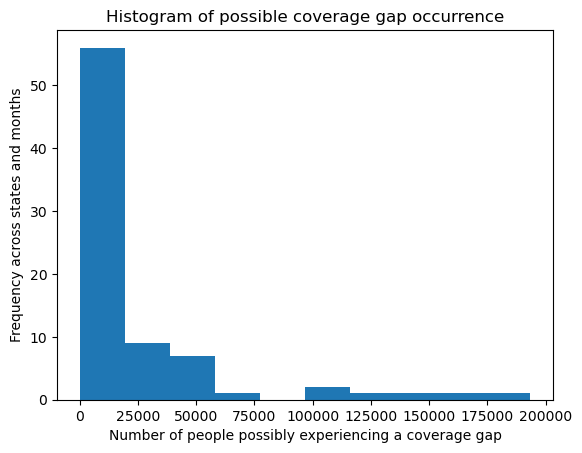

In [31]:
fig = plt.figure()

axes1 = fig.add_subplot(1,1,1)

axes1.hist(data = coverage_gap, x = 'Coverage gap')

axes1.set_title('Histogram of possible coverage gap occurrence')
axes1.set_ylabel('Frequency across states and months')
axes1.set_xlabel('Number of people possibly experiencing a coverage gap')

plt.show()

### 2. How many people may be impacted by a gap in health coverage? 

Summing the total of values in the "Coverage gap" column of the dataframe directly answers this question:

In [32]:
print(coverage_gap['Coverage gap'].sum())

1753977.0


A scatterplot helps visualize the breakdown of that occurrence rate accross months in the reporting period:

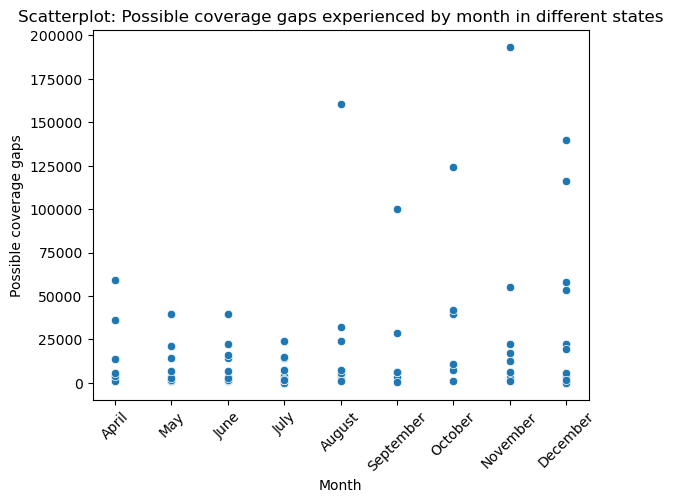

In [33]:
ax = sns.scatterplot(x = coverage_gap['Month'], y = coverage_gap['Coverage gap'])
ax.set_title('Scatterplot: Possible coverage gaps experienced by month in different states')
ax.set_xlabel('Month')
ax.set_ylabel('Possible coverage gaps')
plt.xticks(rotation = 45)
plt.show()

### 3. For how many months in the reporting period are coverage gaps possibly occurring?

The describe function is paired with groupby to generate a dataframe showing the number of times a state occurs in the coverage gap dataset, representing the number of months coverage gaps may have occurred in each state.

In [34]:
print(coverage_gap.groupby('State').Month.count())

State
AK    5
AR    4
FL    4
GA    8
IA    2
KS    1
MO    1
MS    1
MT    8
ND    4
NH    4
OK    7
SC    2
SD    8
TX    7
UT    9
WI    3
WY    1
Name: Month, dtype: int64


### 4. In what states may people be experiencing a gap in health coverage?

I then apply this dataframe to a bar plot using the seaborn objects interface.

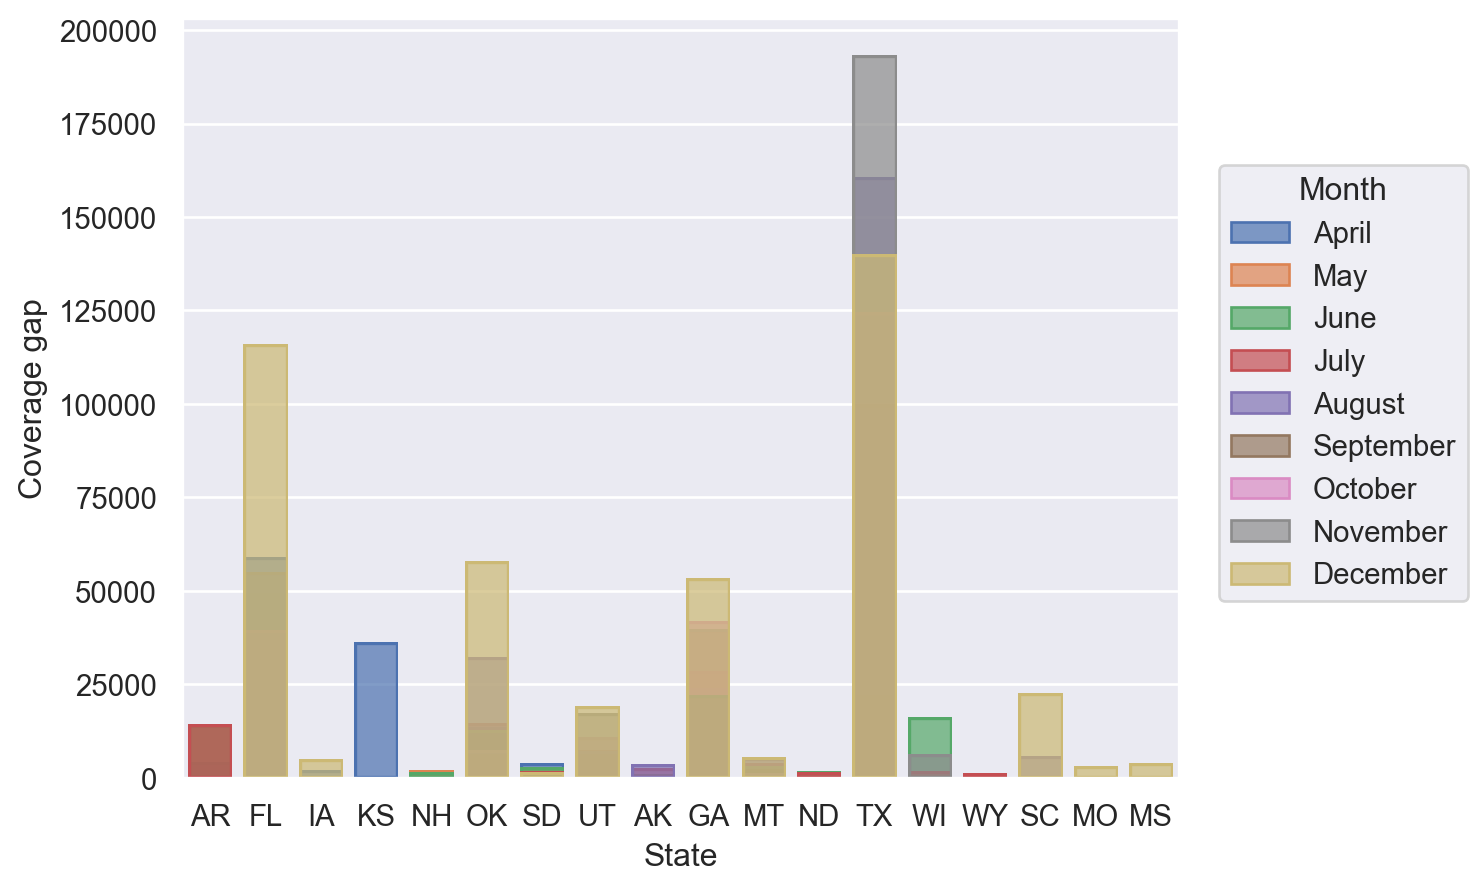

In [35]:
import seaborn.objects as so

so.Plot(coverage_gap, x='State', y='Coverage gap', color='Month').add(so.Bar())

## Data Modeling & Analysis: What role does a state's Medicaid expansion status play in coverage gap occurrence?

### 1. All state data

#### Figure 1: Histograms showing possible coverage gaps in states that have and have not expanded Medicaid eligibility criteria

/Users/zoe/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


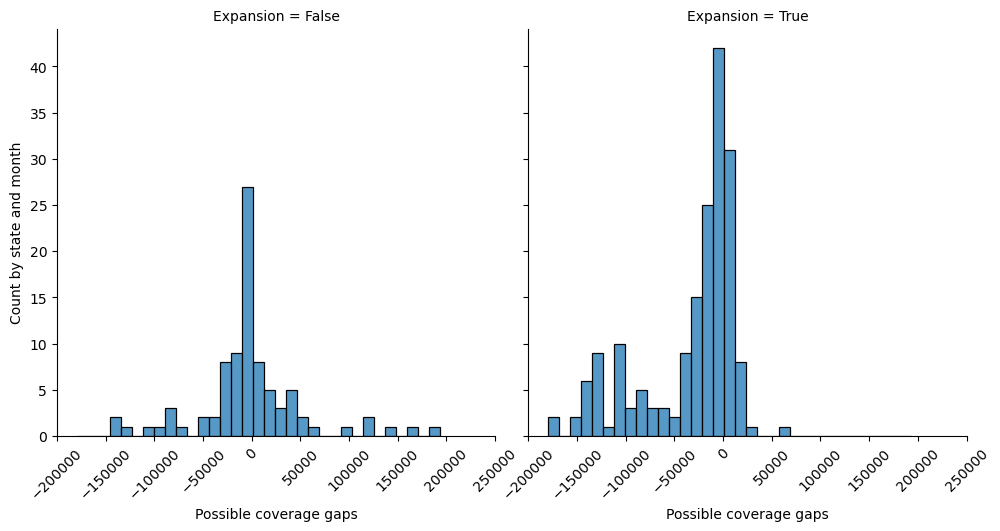

In [36]:
fig = sns.displot(data = unwinding_33, col = 'Expansion', x = 'Coverage gap', kind = 'hist')

fig.set_axis_labels(x_var = 'Possible coverage gaps', y_var = 'Count by state and month')
fig.set_xticklabels(rotation = 45)

plt.show()

### Step 1.a

Because the independent variable is a discrete, binary value of True or False and the dependent variable is a continuous, numeric variable, I import the scipy library to run an independent samples t test.

In [37]:
from scipy import stats

### Step 1.b

Two new subsets are created from the larger dataframe unwinding_33, distinguished by whether or not states in each have or have not expanded Medicaid eligibility criteria (the independent variable). 

In [38]:
has_expanded = unwinding_33[(unwinding['Expansion'] == True)]
has_not_expanded = unwinding_33[(unwinding['Expansion'] == False)]

### Step 1.c

To confirm normal distribution, a Kolmogorov-Smirnov test of normality is run. The Kolmogorov-Smirnov test is chosen due to the size of the datasets being tested, which are greater than 50 samples.

In [39]:
from scipy.stats import kstest

kstest(has_expanded['Coverage gap'], has_not_expanded['Coverage gap'])

KstestResult(statistic=0.24449383713881592, pvalue=0.0005278611870547787, statistic_location=19333.0, statistic_sign=1)

Because the p value is less than .05, it may be concluded that both datasets are normally distributed and the null hypothesis may be accepted.

### Step 1.d

A Levene's test for equality of variances is run to confirm whether or not equal variance can be assumed.

In [40]:
res = stats.levene(has_expanded['Coverage gap'].dropna(), has_not_expanded['Coverage gap'].dropna())
res

LeveneResult(statistic=0.06746533754329632, pvalue=0.7952668503841696)

Because the p value is greater than .05, equal variance may be assumed.

### Step 1.e

Because the datasets have a normal distribution, a parametric Independent One-Sided T Test is run. 

In [41]:
sample1 = has_expanded['Coverage gap']
sample2 = has_not_expanded['Coverage gap']

stats.ttest_ind(sample2, sample1, nan_policy = 'omit', alternative = 'greater', equal_var = True)

TtestResult(statistic=4.709335882404571, pvalue=2.013406810226034e-06, df=263.0)

The p value of .0000002013 is statistically significant, supporting the research hypothesis that more coverage gaps are possibly occurring in states that have not expanded Medicaid than in states that haven't. 

For comparative purposes, the same test will be run without assuming equal variance.

In [42]:
sample1 = has_expanded['Coverage gap']
sample2 = has_not_expanded['Coverage gap']

stats.ttest_ind(sample2, sample1, nan_policy = 'omit', alternative = 'greater', equal_var = False)

TtestResult(statistic=4.537064202580914, pvalue=5.6769049332451566e-06, df=155.3040936850916)

The p value of .00000067 is also statistically significant even without assuming equal variance.

### Step 1.f

Group statistics for possible coverage gaps accross all states will now be generated to include the mean, N, standard deviation, and standard error mean.

In [43]:
has_expanded['Coverage gap'].mean()

-33214.15730337079

In [44]:
has_not_expanded['Coverage gap'].mean()

-1506.528735632184

In [45]:
has_expanded['Coverage gap'].count()

178

In [46]:
has_not_expanded['Coverage gap'].count()

87

In [47]:
import numpy as np

In [48]:
np.nanstd(has_expanded['Coverage gap'])

49405.12413443873

In [49]:
np.nanstd(has_not_expanded['Coverage gap'])

54902.658365142204

In [50]:
has_expanded['Coverage gap'].sem(skipna = True)

3713.5165318637564

In [51]:
has_not_expanded['Coverage gap'].sem(skipna = True)

5920.305907754239

#### Figure 2: Box plot showing the difference of medians, quartiles, and outliers in possible coverage gaps grouped by the independent variable, Medicaid eligibility expansion.

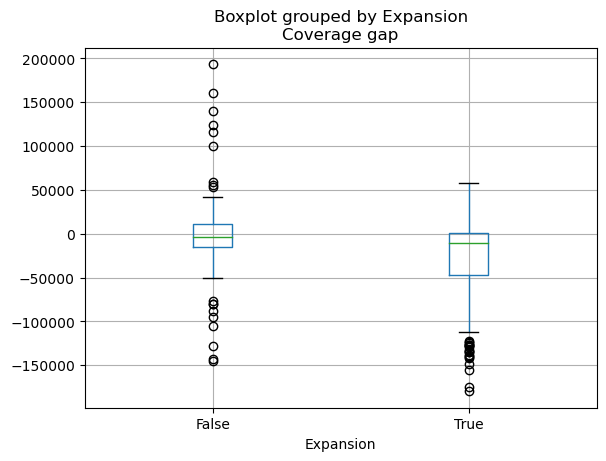

In [52]:
boxplot = unwinding_33.boxplot(column = ['Coverage gap'], by = 'Expansion')

### 2. Biggest possible coverage gaps

#### Figure 3. Histogram showing biggest possible coverage gaps in states that have and have not expanded Medicaid eligibility criteria

In [53]:
biggest_unwinding_33 = unwinding_33.groupby('State').max('Coverage gap')

/Users/zoe/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


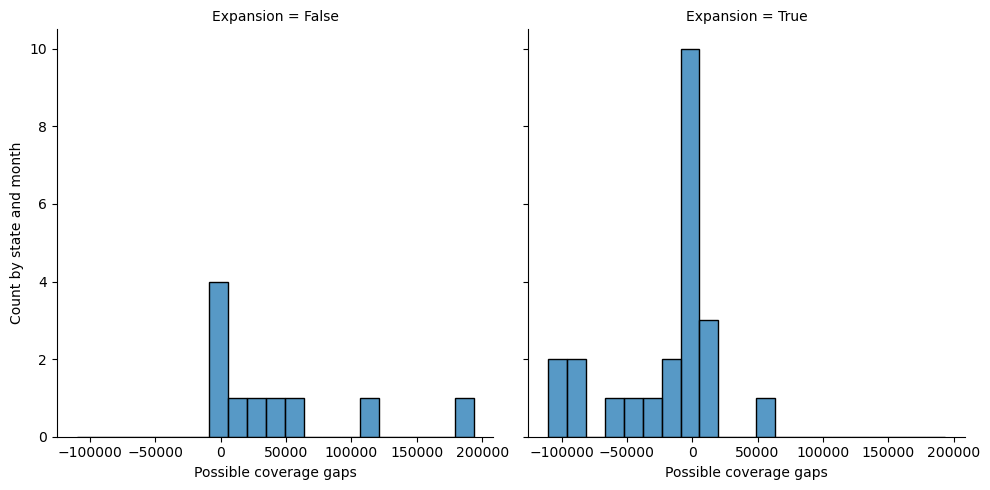

In [54]:
fig = sns.displot(data = biggest_unwinding_33, col = 'Expansion', x = 'Coverage gap', kind = 'hist')

fig.set_axis_labels(x_var = 'Possible coverage gaps', y_var = 'Count by state and month')

plt.show()

### Step 2.a

Because states are conducting unwinding activities at variable paces (resulting in what appear to be large possible coverage gaps in some months and little to none in others), two new subsets account for this variability by narrowing in on only the biggest possible coverage gaps in each state. (In some states, this is still no coverage gaps, represented by numbers in the negatives.)

In [55]:
biggest_has_expanded = has_expanded.groupby('State').max('Coverage gap')
biggest_hasnt_expanded = has_not_expanded.groupby('State').max('Coverage gap')

### Step 2.b

A Shapiro-Wilk test is run to test for normal distribution. 

In [56]:
from scipy.stats import shapiro

sample1 = biggest_has_expanded['Coverage gap'].dropna()
sample2 = biggest_hasnt_expanded['Coverage gap'].dropna()

stat, p = shapiro(sample1)
print(stat, p)
stat, p = shapiro(sample2)
print(stat, p)

0.8552062511444092 0.0033858853857964277
0.7820867300033569 0.005903780926018953


Because the p values are less than .05, normal distribution can not be assumed for these subsets. 

### Step 2.c

A Levene's test for equality of variances is run to confirm whether or not equal variance can be assumed.

In [57]:
res = stats.levene(biggest_has_expanded['Coverage gap'].dropna(), biggest_hasnt_expanded['Coverage gap'].dropna())
res

LeveneResult(statistic=0.3253523230501764, pvalue=0.5722723340075386)

Because the p value is greater than .05, equal variance may be assumed.

In [89]:
biggest_hasnt_expanded

,QHP Enrolled,Medicaid renewed,Medicaid terminated,Expansion,Coverage gap
State,,,,,
AL,28887.0,88306.0,44832.0,False,-4684.0
FL,188156.0,303741.0,249427.0,False,116067.0
GA,61765.0,87708.0,95578.0,False,53408.0
KS,6756.0,17896.0,49508.0,False,36421.0
MS,16683.0,37029.0,29460.0,False,3978.0
NC,65637.0,163456.0,35099.0,False,-28063.0
SC,52995.0,58558.0,28145.0,False,22582.0
SD,626.0,6167.0,9715.0,False,3984.0
TN,27583.0,94940.0,49585.0,False,-4892.0


In [90]:
biggest_has_expanded

,QHP Enrolled,Medicaid renewed,Medicaid terminated,Expansion,Coverage gap
State,,,,,
AK,2610.0,6516.0,9919.0,True,3589.0
AR,17332.0,61236.0,62711.0,True,14421.0
AZ,27593.0,178491.0,66657.0,True,-81299.0
DE,3659.0,11926.0,4615.0,True,-2252.0
HI,2083.0,25625.0,10612.0,True,-10755.0
IA,9760.0,43315.0,44604.0,True,5162.0
IL,37496.0,202769.0,23903.0,True,-110120.0
IN,26251.0,80949.0,52985.0,True,-9522.0
LA,27095.0,115068.0,56311.0,True,-1437.0


### Step 2.d

Because these subsets do not have normal distribution, a non parametric Mann-Whitney U test is run as an alternative to the Independent One-Sided T Test.

In [94]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(biggest_has_expanded['Coverage gap'], biggest_hasnt_expanded['Coverage gap'], method = 'auto', alternative = 'less')
print(U1)

print(p)

69.0
0.008643652353399036


Because the p value is less than .05, it is deemed statistically significant. This reinforces the Mann-Whitney U test results from the larger dataset, and further supports the research hypothesis.  

### Step 2.e

Group statistics for the biggest possible coverage gaps accross all states are now be generated to include the mean, N, standard deviation, and standard error mean.

In [59]:
biggest_has_expanded['Coverage gap'].mean()

-20209.260869565216

In [60]:
biggest_hasnt_expanded['Coverage gap'].mean()

34153.0

In [61]:
biggest_has_expanded['Coverage gap'].count()

23

In [62]:
biggest_hasnt_expanded['Coverage gap'].count()

12

In [63]:
import statistics

In [64]:
statistics.stdev(biggest_has_expanded['Coverage gap'])

43594.117900987716

In [65]:
statistics.stdev(biggest_hasnt_expanded['Coverage gap'])

62315.9892877349

In [66]:
from scipy.stats import sem

In [67]:
sem(biggest_has_expanded['Coverage gap'])

9090.001950459487

In [68]:
sem(biggest_hasnt_expanded['Coverage gap'])

17989.076595045794

#### Figure 4. Box plot showing the difference of medians, quartiles, and outliers in the biggest possible coverage gaps grouped by the independent variable, Medicaid eligibility expansion.

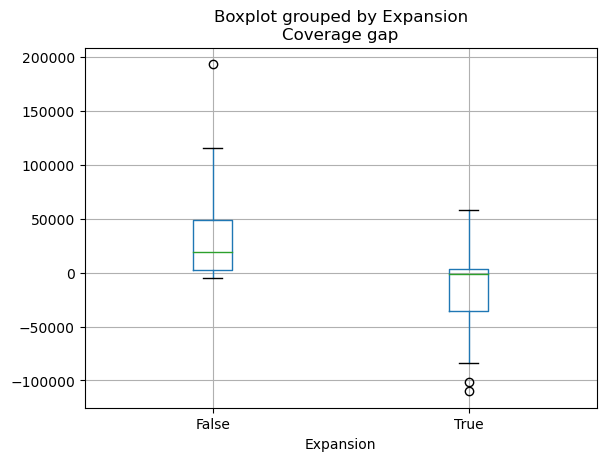

In [69]:
boxplot = biggest_unwinding_33.boxplot(column = ['Coverage gap'], by = 'Expansion')

### 3. South Dakota

One state in this dataset is unique: South Dakota. This is because South Dakota started out in the reporting period with a more restrictive Medicaid eligibility criteria (Expansion = False), and then seveal months into the reporting period, an expanded Medicaid eligibility criteria (Expansion = True) took effect.

#### Figure 5. Histograms showing possible coverage gaps in South Dakota before and after expanding Medicaid eligibility criteria

In [70]:
sd_unwinding_33 = unwinding_33[(unwinding_33['State'] == 'SD')]

/Users/zoe/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


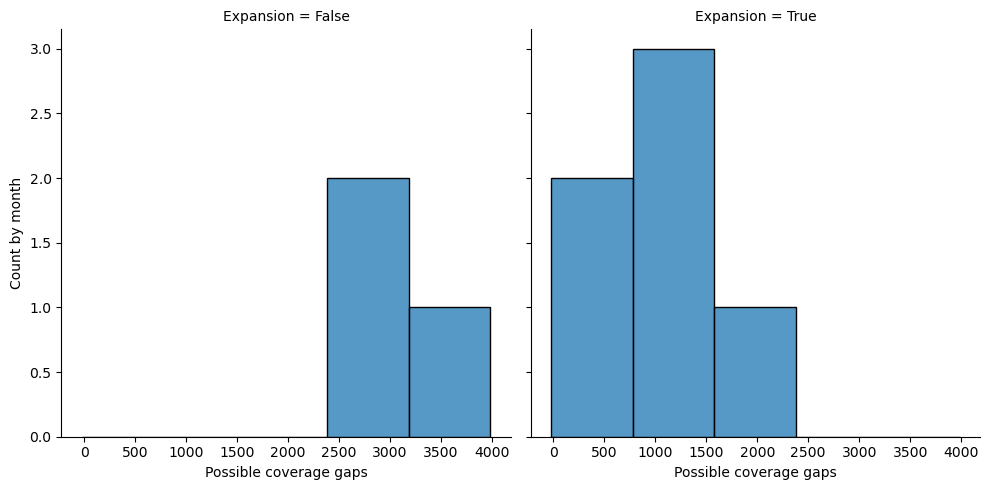

In [71]:
fig = sns.displot(data = sd_unwinding_33, col = 'Expansion', x = 'Coverage gap', kind = 'hist')

fig.set_axis_labels(x_var = 'Possible coverage gaps', y_var = 'Count by month')

plt.show()

### Step 3.a

Two additional subsets are created to represent South Dakota coverage gap data so that this state can be comparatively analyzed against itself in the before and after periods of policy intervention. 

In [72]:
sd_has_expanded = has_expanded[(has_expanded['State'] == 'SD')]
sd_has_expanded.head()

,State,Month,QHP Enrolled,Medicaid renewed,Medicaid terminated,Expansion,Coverage gap
124,SD,July,378.0,4699.0,6134.0,True,1813.0
157,SD,August,360.0,4088.0,4749.0,True,1021.0
190,SD,September,326.0,3337.0,3581.0,True,570.0
223,SD,October,400.0,3413.0,2991.0,True,-22.0
256,SD,November,1209.0,2656.0,2477.0,True,1030.0


In [73]:
sd_hasnt_expanded = has_not_expanded[(has_not_expanded['State'] == 'SD')]
sd_hasnt_expanded.head()

,State,Month,QHP Enrolled,Medicaid renewed,Medicaid terminated,Expansion,Coverage gap
25,SD,April,436.0,6167.0,9715.0,False,3984.0
58,SD,May,626.0,5450.0,7789.0,False,2965.0
91,SD,June,463.0,5450.0,7789.0,False,2802.0


### Step 3.b

Because the South Dakota subset is significantly smaller than the others, a test for normality (Shapiro-Wilk test) is run to prove or disprove the null hypothesis that the two samples have a normal distribution.

In [74]:
from scipy.stats import shapiro

sample1 = sd_has_expanded['Coverage gap']
sample2 = sd_hasnt_expanded['Coverage gap']

stat, p = shapiro(sample1)
print(stat, p)
stat, p = shapiro(sample2)
print(stat, p)

0.9736907482147217 0.9162458777427673
0.8511940836906433 0.24364870700839925


Because both p values are greater than .05, it may be concluded that both datasets are normally distributed and the null hypothesis may be accepted.

### Step 3.c

The Levene's test for equality of variance is now run.

In [75]:
res = stats.levene(sd_has_expanded['Coverage gap'].dropna(), sd_hasnt_expanded['Coverage gap'].dropna())
res

LeveneResult(statistic=0.03767979369305249, pvalue=0.8516005543562672)

### Step 3.d

Because the p value is greater than .05, equal variance can be assumed. Therefore, we will run the one sided t test to assume equal variance.

In [96]:
sample1 = sd_has_expanded['Coverage gap']
sample2 = sd_hasnt_expanded['Coverage gap']

stats.ttest_ind(sample2, sample1, nan_policy = 'omit', alternative = 'greater', equal_var = True)

TtestResult(statistic=4.964756446908954, pvalue=0.0008144031258406659, df=7.0)

Because the p value is less than .05, it is deemed statistically significant. This shows that there is a meaningful difference in the mean possible coverage gaps between the periods before and after South Dakota expanded its Medicaid eligibility criteria. 

For comparative purposes, the same test will be run without assuming equal variance.

In [95]:
sample1 = sd_has_expanded['Coverage gap']
sample2 = sd_hasnt_expanded['Coverage gap']

stats.ttest_ind(sample2, sample1, nan_policy = 'omit', alternative = 'greater', equal_var = False)

TtestResult(statistic=4.990103395460634, pvalue=0.0034363536163340464, df=4.144483011715942)

### Step 3.e

Group statistics for possible coverage gaps in South Dakota will now be generated to include the mean, N, standard deviation, and standard error mean.

In [78]:
sd_has_expanded['Coverage gap'].mean()

979.8333333333334

In [79]:
sd_hasnt_expanded['Coverage gap'].mean()

3250.3333333333335

In [80]:
sd_has_expanded['Coverage gap'].count()

6

In [81]:
sd_hasnt_expanded['Coverage gap'].count()

3

In [82]:
statistics.stdev(sd_has_expanded['Coverage gap'])

649.206104920977

In [83]:
statistics.stdev(sd_hasnt_expanded['Coverage gap'])

640.5796853892053

In [84]:
sem(sd_has_expanded['Coverage gap'])

265.0372824926922

In [85]:
sem(sd_hasnt_expanded['Coverage gap'])

369.8388537968636

#### Figure 6. Box plot showing the difference in medians, quartiles, and outliers in possible coverage gaps in South Dakota only, before and after the state expanded its Medicaid eligibility criteria

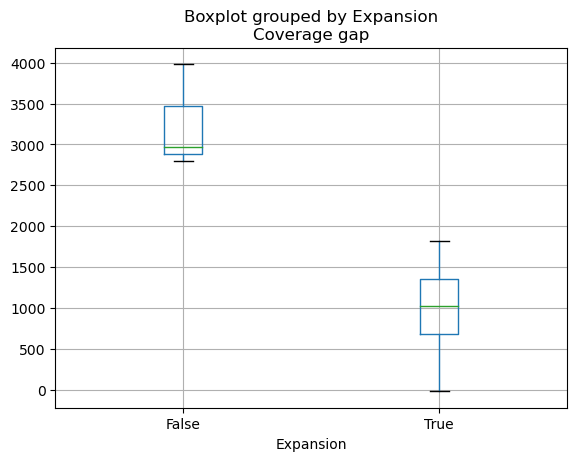

In [86]:
boxplot = sd_unwinding_33.boxplot(column = ['Coverage gap'], by = 'Expansion')